In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('dataset/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
df.Embarked.value_counts().index[0]

'S'

In [7]:
df.fillna({'Age':df.Age.median(),'Embarked':'S'},inplace=True)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
df[df.Survived==1].Age.hist()

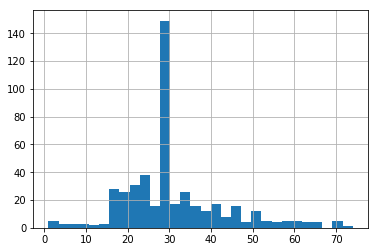

In [10]:
df[(df.Survived==0)&(df.Sex=='male')].Age.hist(bins=30)

In [11]:
df[(df.Survived==0)&(df.Fare==0)].Sex.value_counts()

male    14
Name: Sex, dtype: int64

In [12]:
def check(x):
    return x*.8

In [13]:
f=df[(df.Sex=='female')&(df.Age>50)].Fare.apply(check)
f.index

Int64Index([ 11,  15, 195, 268, 275, 366, 483, 496, 513, 571, 591, 765, 772,
            774, 820, 829, 879],
           dtype='int64')

In [14]:
df.loc[f.index,'Fare']=f

In [15]:
f

11      21.24000
15      12.80000
195    117.21664
268    122.77000
275     62.36664
366     60.20000
483      7.67000
496     62.61336
513     47.52000
571     41.18336
591     62.61336
765     62.36664
772      8.40000
774     18.40000
820     74.80000
829     64.00000
879     66.52664
Name: Fare, dtype: float64

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.Embarked.value_counts()

S    131
C     69
Q      4
Name: Embarked, dtype: int64

In [19]:
df[['Age','Fare']].describe()

,Age,Fare
count,204.000000,204.000000
mean,35.100098,75.128885
std,15.100836,74.226969
min,0.920000,0.000000
25%,25.000000,29.453125
50%,34.000000,55.220850
75%,47.000000,89.104200
max,80.000000,512.329200


In [20]:
df.Age.agg(['mean','median'])

mean      35.100098
median    34.000000
Name: Age, dtype: float64

In [21]:
import matplotlib.pyplot as plt

In [22]:
df[df.Survived==1].shape

(136, 12)

In [23]:
df[df['Survived']==1].Sex.value_counts()

female    91
male      45
Name: Sex, dtype: int64

In [24]:
df[df['Survived']==1].Sex.value_counts()

female    91
male      45
Name: Sex, dtype: int64

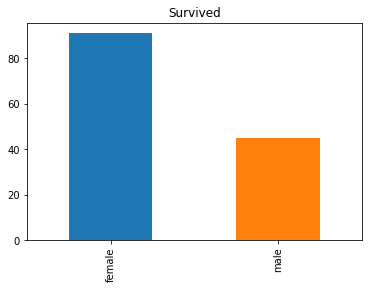

In [25]:
df[df['Survived']==1].Sex.value_counts().plot(kind='bar')
plt.title('Survived')
plt.show()

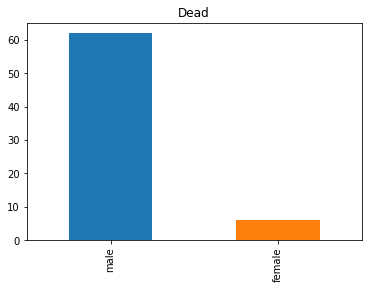

In [26]:
df[df['Survived']==0].Sex.value_counts().plot(kind='bar')
plt.title('Dead')
plt.show()